In [1]:
#PREDICTING DIGIT LABELS BASED ON IMAGES
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

Image Data Shape (1797, 64)


In [3]:
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Label Data Shape (1797,)


In [4]:
data = load_digits()
df = pd.DataFrame(data.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
df2 = pd.DataFrame(data.target)
df2.head()

,0
0,0
1,1
2,2
3,3
4,4


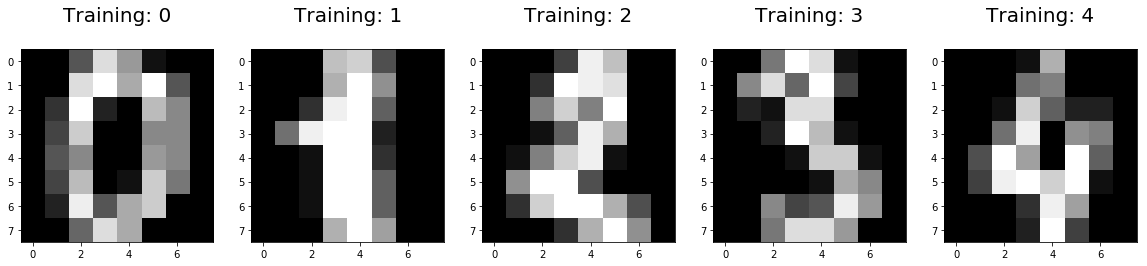

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
images = list(zip(digits.data[0:5], digits.target[0:5]))

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(images):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1347, 64)
(1347,)
(450, 64)
(450,)


In [9]:
#SKLEARN 4-STEP MODELING PATTERN
#Step 1: Import the model you want to use (Here: Logistic Regression)
#Step 2: Make an isntance of the model
#Step 3: Training the model on the data, storing the information learned from the data
#Step 4: Predict the labels of new data (new images)

In [10]:
#Step 1
from sklearn.linear_model import LogisticRegression

In [11]:
#Step 2
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [12]:
#Step 3
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
#Step 4
# Predict for one image
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [14]:
logisticRegr.decision_function(x_train)

array([[-33.38075779, -16.70192091,  14.66650338, ..., -28.96191583,
        -10.3421255 , -31.1511727 ],
       [-20.56027617, -24.40866854, -13.99256176, ..., -19.58892776,
         -1.57423979,  -6.21153265],
       [ -8.25501867, -24.03143909, -22.88213187, ..., -26.5185443 ,
         -6.42186069,   9.69134724],
       ..., 
       [-20.16229096, -23.66154012,  -9.95991618, ...,  10.50927845,
         -7.87780062, -28.95299248],
       [-19.7025457 , -21.79600794, -22.358844  , ...,  10.14838609,
        -18.39680638, -30.96560243],
       [-21.83454738, -21.6986599 , -13.9026743 , ..., -24.64289993,
          2.82787602, -25.50318952]])

In [15]:
y_test[0]

2

In [16]:
#predict for ten images
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [17]:
y_test[0:10]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [18]:
predictions = logisticRegr.predict(x_test)

In [19]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.953333333333


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [21]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


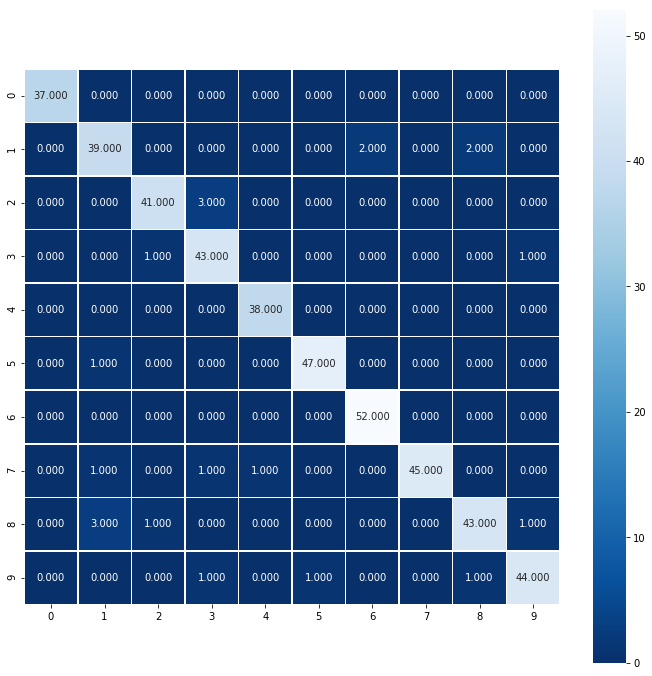

In [22]:
f, ax = plt.subplots(figsize = (12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax=ax);
plt.show()

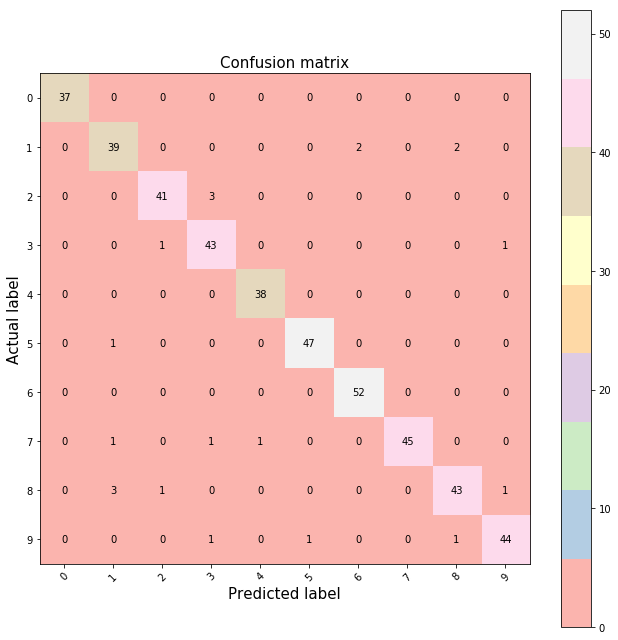

In [23]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')
plt.show()

In [24]:
#Find and plot the miss classified images
index = 0
mci = []
images = list(zip(predictions, y_test))
for predict, actual in images:
    if predict != actual:
        mci.append(index)
    index +=1

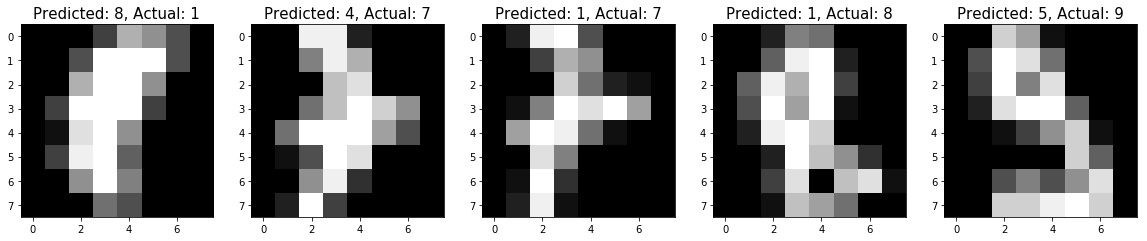

In [25]:
plt.figure(figsize=(20,4))
for pi, wrong in enumerate(mci[0:5]):
    plt.subplot(1, 5, pi + 1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong]), fontsize = 15)
plt.show()

In [26]:
#Try image classification using a bigger dataset with bigger images (28x28 pixels)

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [27]:
# These are the images
# There are 70,000 images (28 by 28 images for a dimensionality of 784)
print(mnist.data.shape)
# These are the labels
print(mnist.target.shape)

(70000, 784)
(70000,)


In [28]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
 mnist.data, mnist.target, test_size=1/7.0, random_state=0)

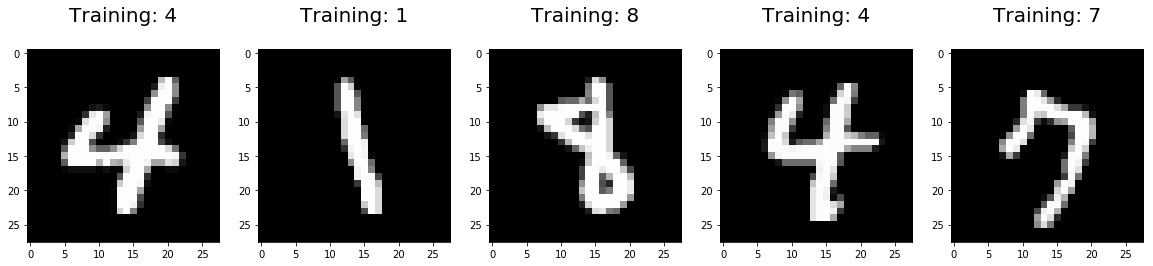

In [29]:
plt.figure(figsize=(20,4))
images = list(zip(train_img[0:5], train_lbl[0:5]))

for index, (image, label) in enumerate(images):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)
plt.show()




In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [32]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array([ 1.])

In [34]:
logisticRegr.predict(test_img[0:10])

array([ 1.,  9.,  2.,  2.,  7.,  1.,  8.,  3.,  3.,  7.])

In [35]:
predictions = logisticRegr.predict(test_img)

In [36]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9131


In [37]:
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
images = list(zip(predictions, test_lbl))
for label, predict in images:
 if label != predict: 
  misclassifiedIndexes.append(index)
  index +=1

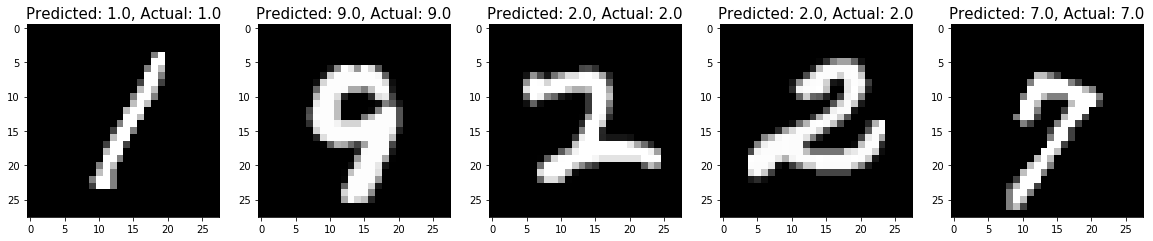

In [38]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
 plt.title("Predicted: {}, Actual: {}".format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)
plt.show()

In [39]:
#Find and plot the miss classified images
index = 0
mci = []
images = list(zip(predictions, y_test))
for predict, actual in images:
    if predict != actual:
        mci.append(index)
    index +=1

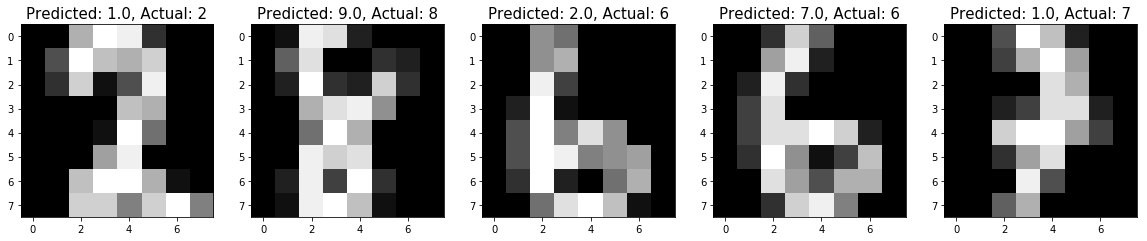

In [40]:
plt.figure(figsize=(20,4))
for pi, wrong in enumerate(mci[0:5]):
    plt.subplot(1, 5, pi + 1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong]), fontsize = 15)
plt.show()